In [1]:
## caged_brach
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import geopandas as gpd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999
pd.options.display.max_colwidth = 200


import basedosdados as bd
import plotly.express as px

/Users/m/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [44]:
df = pd.read_csv('../data/radiology/data.csv')
df['volume'] = df['volume'].astype(float)
df['dose'] = df['dose'].astype(float)

df = df.sort_values(by=['roi','bin'])


colors = {
 'CTV CENTRAL CT1':'violet', # a definir
 'CTV CENTRAL CT2':'darkviolet',
          
 'CTV CT1':"red", #vermelho
 'CTV CT2': "#B50000",
          
 'PULMAO ESQUERDO CT1':"green", #verde
 'PULMAO ESQUERDO CT2': "darkgreen",
          
 'PULMAO DIREITO CT1':'blue', # azul
 'PULMAO DIREITO CT2':"darkblue",

}

legend_order = [
    'CTV CT1',
    'CTV CT2',
    'CTV CENTRAL CT1',
    'CTV CENTRAL CT2',
    'PULMAO DIREITO CT1',
    'PULMAO DIREITO CT2',
    'PULMAO ESQUERDO CT1',
    'PULMAO ESQUERDO CT2'
]

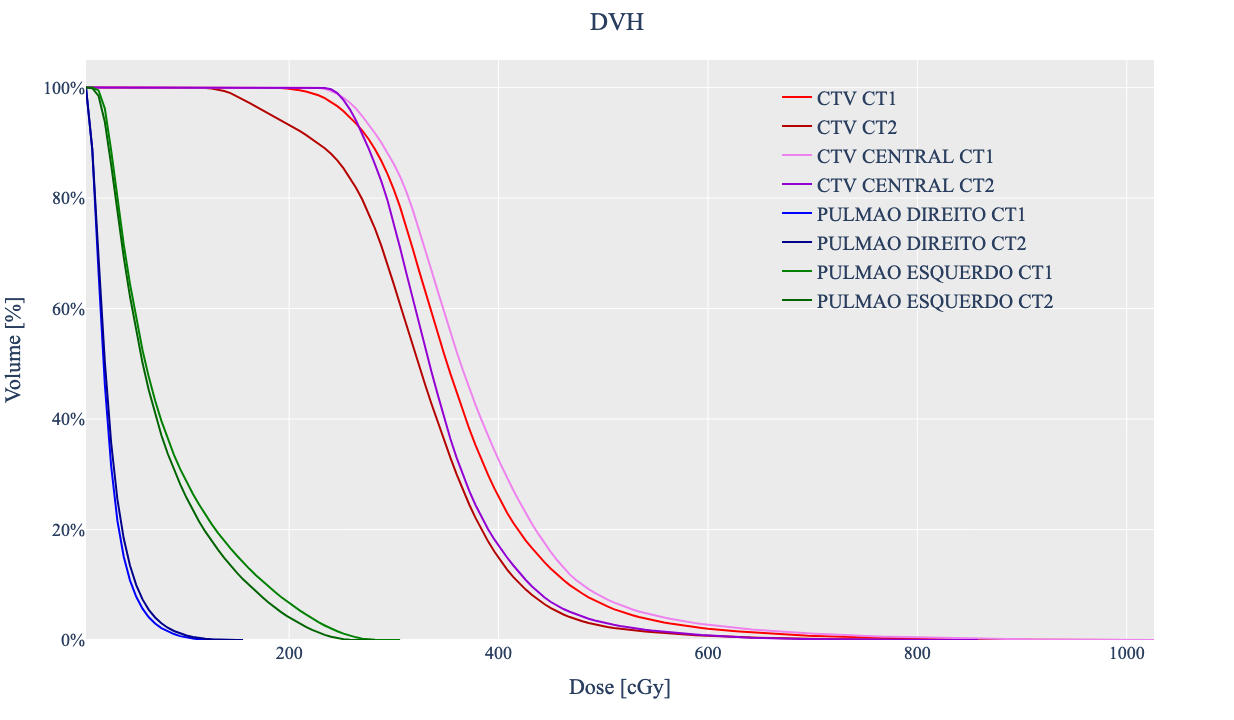

In [50]:
def get_layout(fig, title):

    return fig.update_layout(
        title=title,
        title_x=0.5,
        hovermode= 'x', #"x unified",
        height=720,
        # width=920,
        font=dict(
            family="Ubuntu",
            size=18,
        ),
        plot_bgcolor="#ebebeb",
        legend=dict(
            x=0.78,
            y=0.97,
            xanchor="center",
            yanchor="top",
            bgcolor="rgba(0, 0, 0, 0)",
            font=dict(size=20),
            title = ''
        ),
    )



fig = px.line(
    df,
    x="dose",
    y="volume",
    color='roi',
    # hover_name="tile_id",
    labels={
        "dose": f"Dose [cGy]",
        "volume": f"Volume [%]",
    },
    color_discrete_map=colors,
    category_orders = {'roi':legend_order},
    
)


fig = get_layout(fig, title=f"DVH")
fig.update_yaxes(ticksuffix="%", showgrid=True)  # the y-axis is in dollars
fig.update_traces(line=dict(width=2))
fig.update(layout_yaxis_range = [0,105])